In [8]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [10]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [28]:
# Plot your data to see what's in your DataFrame
market_data =df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)
hvplot.show(market_data)

Launching server at http://localhost:49480


## df_market_data line chart

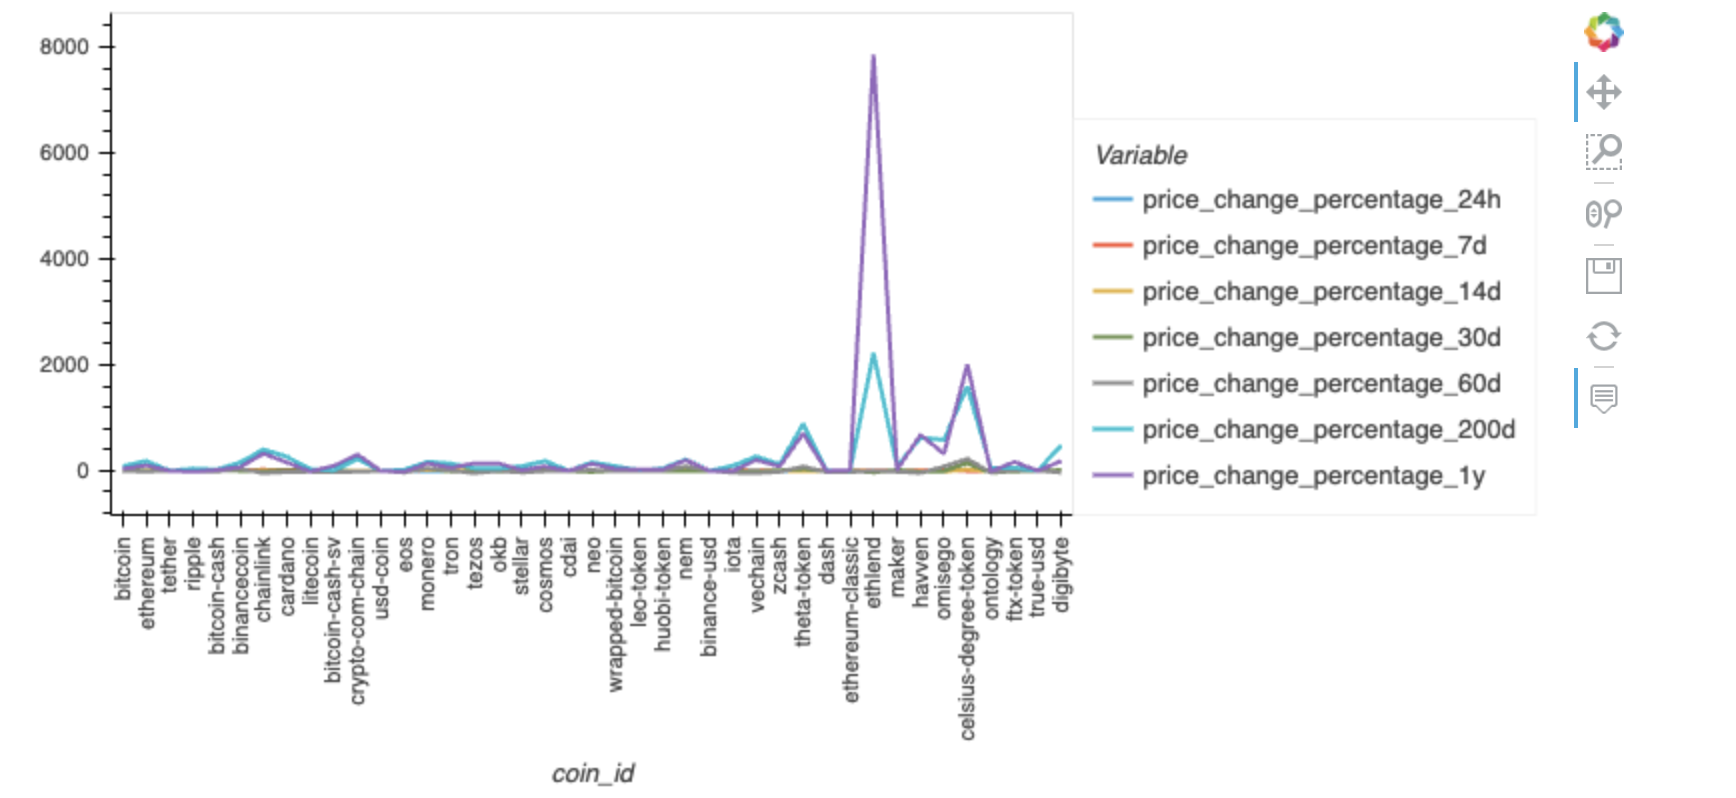

---

### Prepare the Data

In [12]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])

data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [13]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(data_scaled, columns=['price_change_percentage_24h', 'price_change_percentage_7d',
        'price_change_percentage_14d', 'price_change_percentage_30d',
        'price_change_percentage_60d', 'price_change_percentage_200d',
        'price_change_percentage_1y'])

# Copy the crypto names from the original data
scaled_data_df["coin_id"] = df_market_data.index
# Set the coinid column as index
scaled_data_df = scaled_data_df.set_index('coin_id')

# Display sample data
scaled_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [14]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [15]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters = i, random_state=0)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_market_data)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)

/Users/kpnovak91/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kpnovak91/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kpnovak91/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kpnovak91/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

In [16]:
# Create a dictionary with the data to plot the Elbow curve
e_curve = {"K": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
e_df = pd.DataFrame(e_curve)

In [17]:
# Dataframe Sample
e_df.head(10)

,K,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.373295e+05
5,6,2.696061e+05
6,7,1.998921e+05
7,8,1.573295e+05
8,9,1.187439e+05
9,10,9.304067e+04


In [30]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
e_linechart = e_df.hvplot.line(
    x="K",
    y="inertia",
    title="What is the Best Value for K?",
    xticks=k
)

hvplot.show(e_linechart)

Launching server at http://localhost:49496


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for K is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [31]:
# Initialize the K-Means model using the best value for k
KMeans_Cluster = KMeans(n_clusters=4, random_state=0)

In [32]:
# Fit the K-Means model using the scaled data
KMeans_Cluster.fit(scaled_data_df)

/Users/kpnovak91/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [33]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict_kmeans_cluster = KMeans_Cluster.predict(scaled_data_df)

# Print the resulting array of cluster values.
predict_kmeans_cluster

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [34]:
# Create a copy of the DataFrame
prediction_df = scaled_data_df.copy()

In [35]:
# Add a new column to the DataFrame with the predicted clusters
prediction_df['Predicted Clusters'] = predict_kmeans_cluster

# Display sample data
prediction_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [41]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
price_change_per=prediction_df.hvplot.scatter(
                    x="price_change_percentage_24h",
                    y="price_change_percentage_7d",
                    by="Predicted Clusters",
                    hover_cols=['coin_id']
                )
hvplot.show(price_change_per)

Launching server at http://localhost:49551


---

### Optimize Clusters with Principal Component Analysis.

In [42]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [43]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
three_pca = pca_model.fit_transform(scaled_data_df)
# View the first five rows of the DataFrame. 
three_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [44]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [45]:
# Adding of the Arrays from above
# (Use Sum) to find the totoal explained variance of the three principal components

sum(pca_model.explained_variance_ratio_)

0.8950316570309842

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variannce is 89%

In [46]:
# Create a new DataFrame with the PCA data.
three_pca_df = pd.DataFrame(three_pca, columns= ["PCA_1", "PCA_2", "PCA_3"])
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
three_pca_df['coin_id'] = df_market_data.index

# Set the coinid column as index
three_pca_df= three_pca_df.set_index('coin_id')

# Display sample data
three_pca_df.head(10)

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [47]:
# Create a list with the number of k-values from 1 to 11
pca_k = list(range(1,11))

In [48]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=i, random_state=0)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(three_pca_df)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)


/Users/kpnovak91/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kpnovak91/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kpnovak91/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kpnovak91/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

In [49]:
# Create a dictionary with the data to plot the Elbow curve
e_curve = {"K_PCA": pca_k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
e_df_pca = pd.DataFrame(e_curve)

In [50]:
# View Data Frame
e_df_pca.head(10)

,K_PCA,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.720626
6,7,21.182776
7,8,17.016962
8,9,13.668325
9,10,10.484890


In [52]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
e_pca_linechart = e_df_pca.hvplot.line(
    x="K_PCA",
    y="inertia",
    title="What is the Best Value for K: PCA Data",
    xticks=k
)


In [54]:
# View Line Chart
hvplot.show(e_pca_linechart)

Launching server at http://localhost:49587


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** When using the PCA Data, the best value for k is 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  In reviewing the best value for K using the original data, 4 was a better value

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [55]:
# Initialize the K-Means model using the best value for k
KMeans_Cluster = KMeans(n_clusters=3, random_state=0)

In [56]:
# Fit the K-Means model using the PCA data
KMeans_Cluster.fit(three_pca_df)

/Users/kpnovak91/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [57]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predict_kmeans_cluster = KMeans_Cluster.predict(three_pca_df)
# Print the resulting array of cluster values.
predict_kmeans_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int32)

In [58]:
# Create a copy of the DataFrame with the PCA data
three_pca_prediction_df =three_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
three_pca_prediction_df['Predicted_Three_PCA_Clusters']= predict_kmeans_cluster

# Display sample data
three_pca_prediction_df.head(10)

,PCA_1,PCA_2,PCA_3,Predicted_Three_PCA_Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,1
binancecoin,-0.516534,1.388377,0.804071,1
chainlink,-0.450711,0.517699,2.846143,1
cardano,-0.345600,0.729439,1.478013,1
litecoin,-0.649468,0.432165,0.600303,1


In [60]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
three_pca_scatplot=three_pca_prediction_df.hvplot.scatter(
    x="PCA_1",
    y="PCA_2",
    by="Predicted_Three_PCA_Clusters",
    hover_cols=['Crypto_names']
)

hvplot.show(three_pca_scatplot)

Launching server at http://localhost:49629


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [64]:
# Composite plot to contrast the Elbow curves
e_linechart + e_pca_linechart
hvplot.show(e_linechart + e_pca_linechart)

Launching server at http://localhost:50421


In [73]:
# Composite plot to contrast the Elbow curves
e_linechart * e_pca_linechart
hvplot.show(e_linechart * e_pca_linechart)

Launching server at http://localhost:50588


In [76]:
# Composite plot to contrast the clusters
price_change_per + three_pca_scatplot
hvplot.show(price_change_per + three_pca_scatplot)

Launching server at http://localhost:50614


In [78]:
# Composite plot to contrast the clusters
price_change_per * three_pca_scatplot
hvplot.show(price_change_per * three_pca_scatplot)

Launching server at http://localhost:50628


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Comparing PCA to the scaled data, using PCA  led to near exact clustering of data. Scaling down the data provides for greater findings